In [1]:
# =============================================================================
#  Spotify Dataset gener oriented breakdown and classification 
# =============================================================================
#  Author : Matan Ziv
#  Date   : 18-Jun-2025
# =============================================================================

# -----------------------------
# 0. House-keeping
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                # visualisation library as required
from pathlib import Path
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

plt.style.use("default")             # keep default style; avoid seaborn themes
sns.set_context("notebook")

RANDOM_STATE = 42                    # reproducibility

Loaded 232,725 rows × 18 columns

first 5 tracks:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390



 Information: how many sells at each column are null and whats the data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  flo

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


Lets unsersted the genres better
The DatSet contain: 27 genres
Genre traks count [9681 9646 9543 9441 9386 9377 9353 9299 9295 9272 9263 9256 9232 9096
 9089 9023 8992 8936 8927 8874 8771 8701 8664 8280 7806 5403  119]


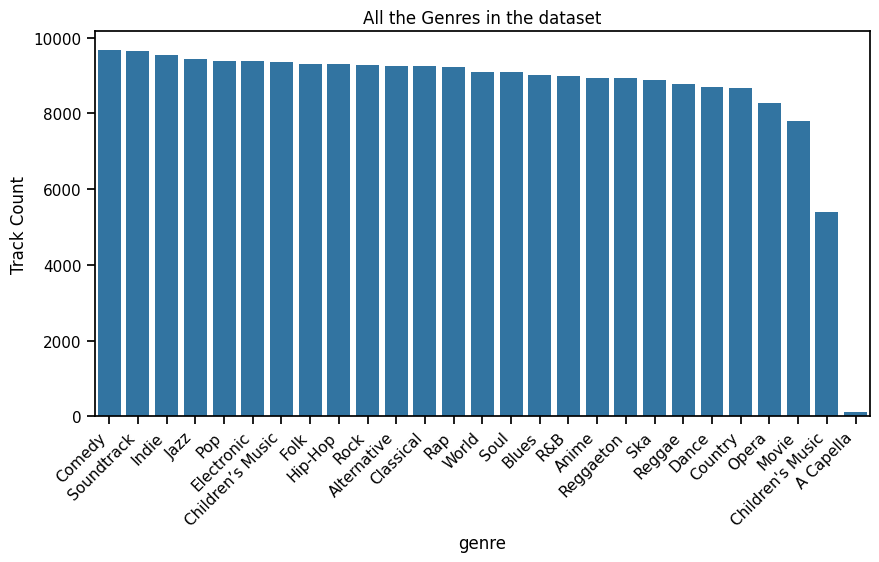

In [25]:
# -----------------------------
# 1. Load the dataset
# -----------------------------
DATA_PATH = Path(r"C:\Users\matan\Desktop\Code\DataSets\SpotifyFeatures/SpotifyFeatures.csv")
assert DATA_PATH.exists(), f"File not found: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")

# Peek at the data ------------------------------------------------------------
print("\nfirst 5 tracks:")
display(df.head())                   # first 5 tracks
print("\n Information: how many sells at each column are null and whats the data type")
df.info(show_counts=True)            # dtypes & missing-value counts
print("\n More details about the fildes: min, max, std, and X%")
display(df.describe().T)             # numeric summary (transposed for width)
print("Lets unsersted the genres better")

genre_counts = df['genre'].value_counts().sort_values(ascending=False)
print(f"The DatSet contain: {genre_counts.count()} genres")
# print("Genre traks count", genre_counts.values)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=45, ha="right")
plt.title("All the Genres in the dataset")
plt.ylabel("Track Count")
# plt.tight_layout()
plt.show()


Missing-value counts:
track_name    1
dtype: int64




#############################################################################


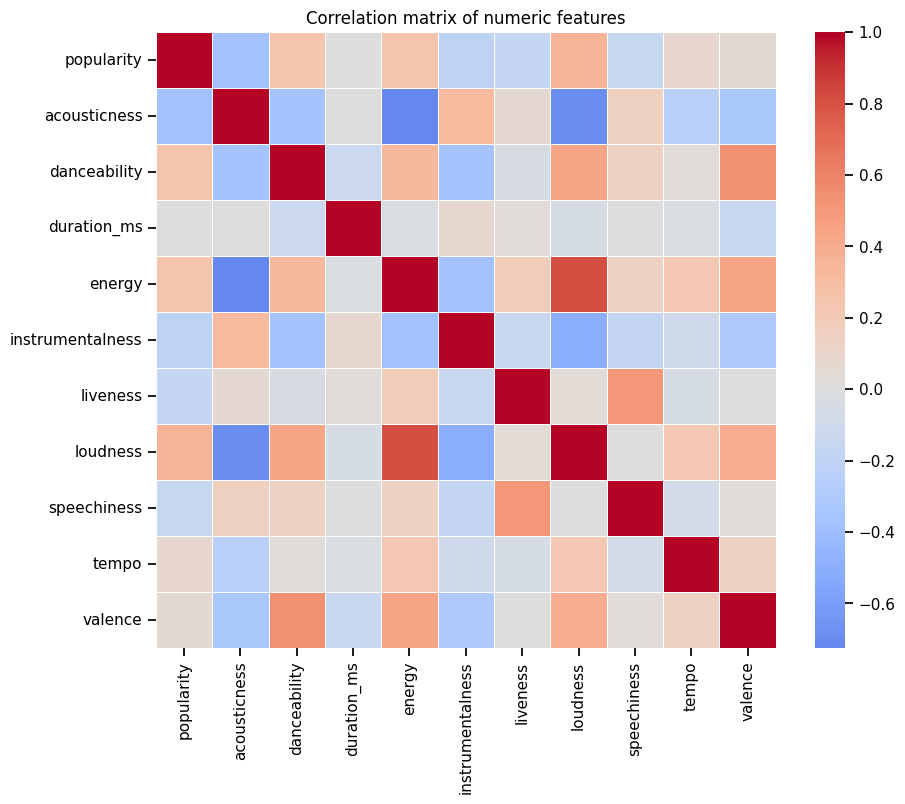





#############################################################################


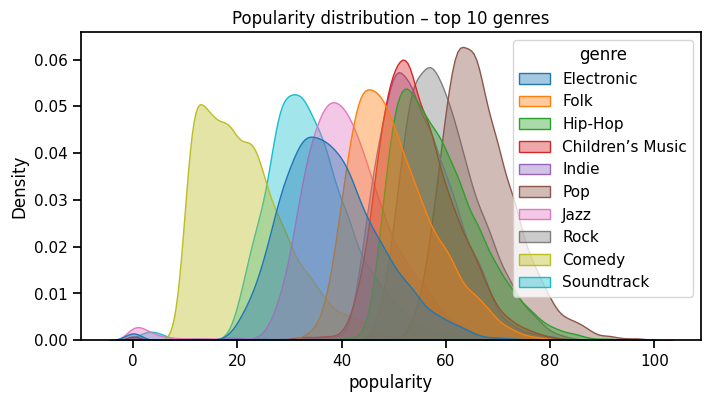

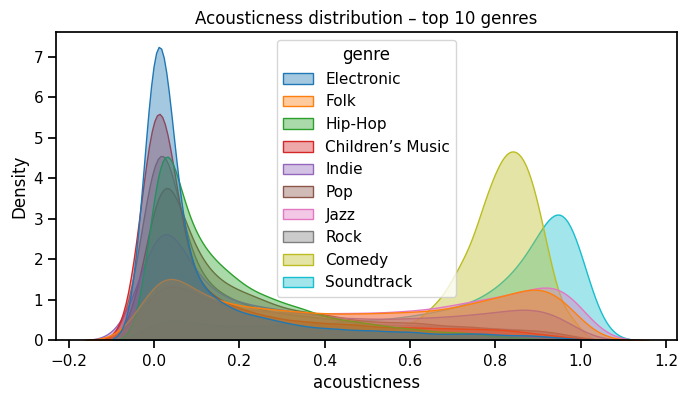

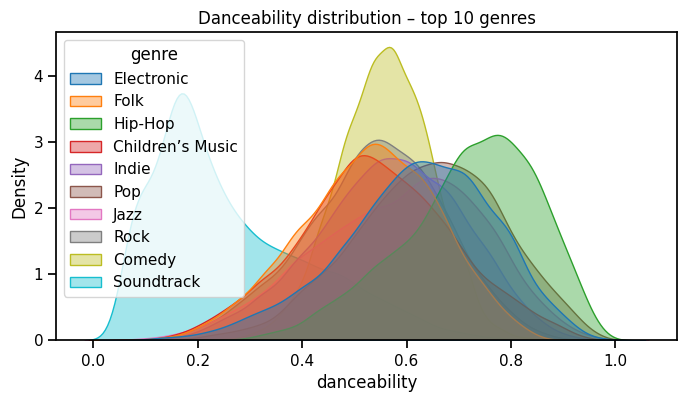

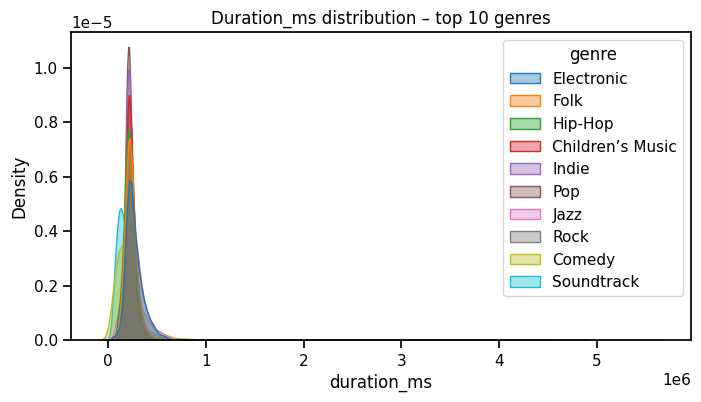

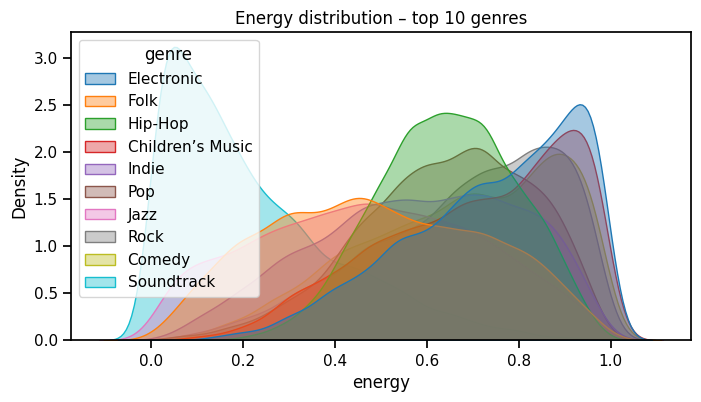

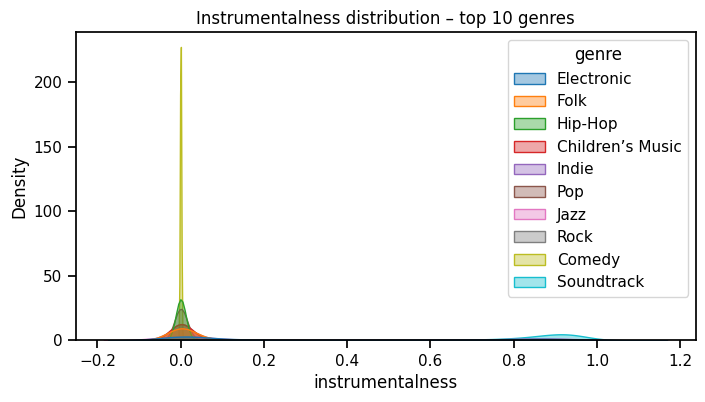

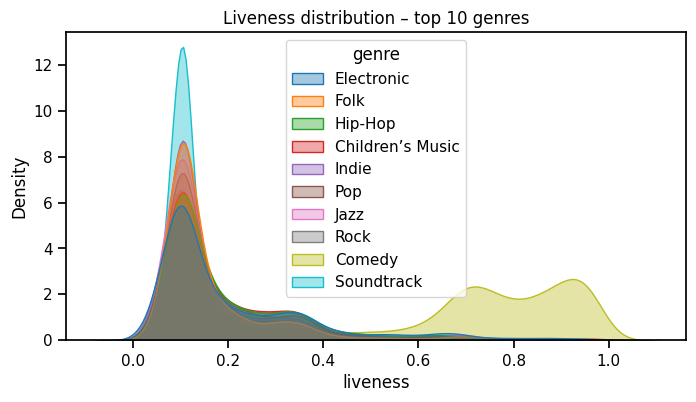

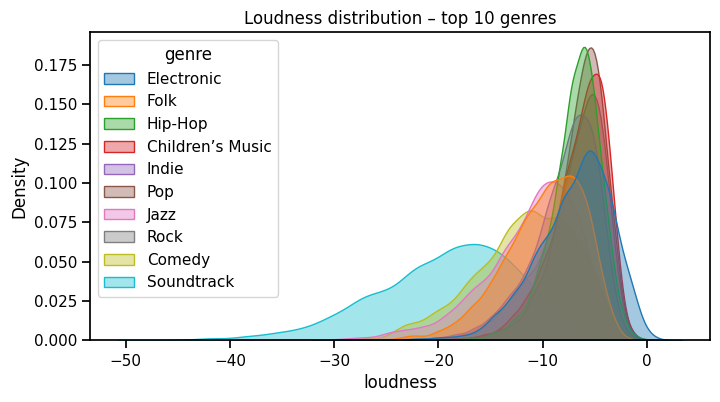

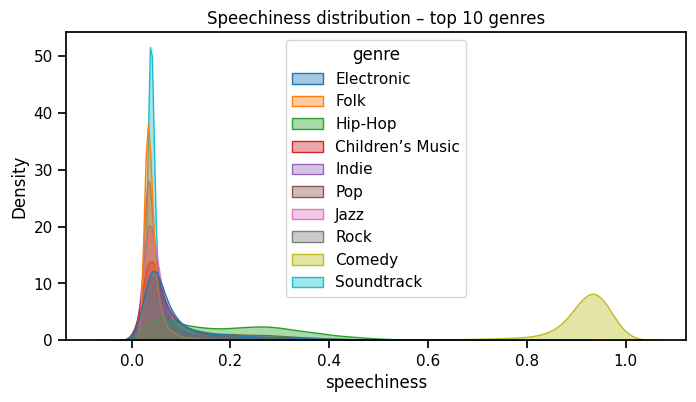

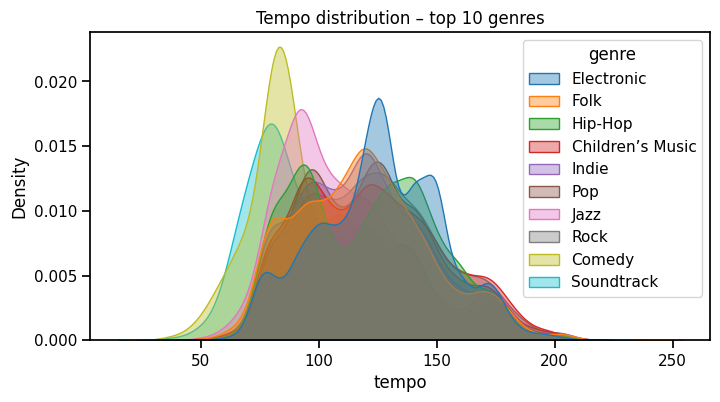

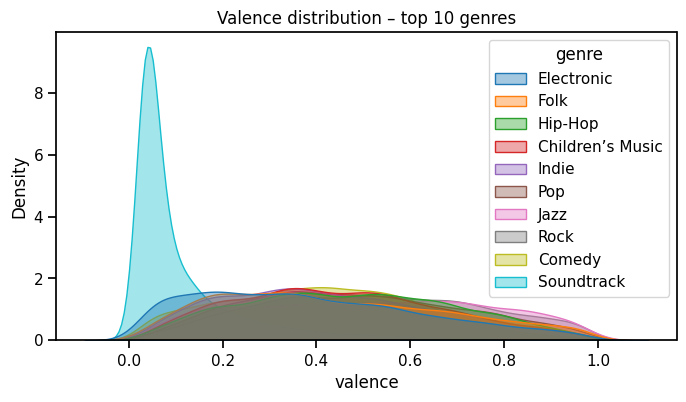




#############################################################################

🎤 Top 15 consistently popular artists (≥25 tracks):
     artist_name mean_popularity  n_tracks
     Post Malone            76.0        85
      Juice WRLD            75.5        40
          Offset            74.7        58
          Khalid            74.4        32
    XXXTENTACION            73.0       106
    Metro Boomin            73.0        41
         6ix9ine            72.9        26
      Ed Sheeran            72.9        47
   Ariana Grande            72.6       142
Hailee Steinfeld            72.3        25
       Bad Bunny            72.0        34
        Lil Peep            71.7        56
   Alec Benjamin            71.7        25
  Camila Cabello            71.0        50
      Marshmello            70.8        34


In [34]:
# -----------------------------
# 2. Exploratory Data Analysis
# -----------------------------
# 2.1 Missing values ----------------------------------------------------------
na_counts = df.isna().sum()# if df.isna().sum() is not None else 0.0
print("\nMissing-value counts:")
print(na_counts[na_counts > 0] if na_counts.any() else "No missing values")

print("\n\n\n\n#############################################################################")

# 2.2 Correlation heat-map ----------------------------------------------------
numeric_cols = df.select_dtypes("number").columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    center=0,
    linewidths=.5
)
plt.title("Correlation matrix of numeric features")
plt.show()

print("\n\n\n\n#############################################################################")
# 2.3 Distributions per genre -------------------------------------------------
top_genres = (df["genre"]
              .value_counts()
              .head(10)
              .index)

# Automatically select all numerical columns
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
# for col in ["danceability", "energy", "acousticness", "valence", "popularity"]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(
        data=df[df["genre"].isin(top_genres)],
        x=col,
        hue="genre",
        common_norm=False,
        fill=True,
        alpha=.4
    )
    plt.title(f"{col.capitalize()} distribution – top 10 genres")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

print("\n\n\n#############################################################################")

# 2.4 Popularity leaderboard --------------------------------------------------
leaderboard = (df.groupby("artist_name", as_index=False)
                 .agg(mean_popularity=("popularity", "mean"),
                      n_tracks=("track_id", "count"))
                 .query("n_tracks >= 25")      # keep artists with ≥25 tracks
                 .sort_values("mean_popularity", ascending=False)
                 .head(15))

print("\nTop 15 consistently popular artists (≥25 tracks), JUST 4 FUN:")
#display(leaderboard.style.format({"mean_popularity": "{:.1f}"}))
print(leaderboard.to_string(index=False, formatters={"mean_popularity": "{:.1f}".format}))


In [35]:
# -----------------------------
# 3. Feature Engineering
# -----------------------------
# 3.1 New domain-aware features ----------------------------------------------
df_fe = df.copy()

#  • Track length in minutes (more intuitive than milliseconds)
df_fe["duration_min"] = df_fe["duration_ms"] / 1000 / 60

#  • Loudness is negative dBFS; turn it into positive energy-adjusted measure
df_fe["energy_loudness_ratio"] = df_fe["energy"] / df_fe["loudness"].abs()

#  • Is major key?  (mode 1 = major)
df_fe["is_major"] = (df_fe["mode"] == 1).astype(int)

#  • Tempo bins (slow / medium / fast) – useful categorical split
tempo_q = df_fe["tempo"].quantile([.33, .66]).values
df_fe["tempo_bin"] = pd.cut(
    df_fe["tempo"],
    bins=[-np.inf, tempo_q[0], tempo_q[1], np.inf],
    labels=["slow", "medium", "fast"]
)

#  • Acoustic-instrumental synergy (handy for genre separation)
df_fe["acoustic_instrumentalness"] = (
    df_fe["acousticness"] * df_fe["instrumentalness"]
)

# 3.2 Preparing data for modelling -------------------------------------------
#  Select features ------------------------------------------------------------
NUMERICS = [
    "popularity", "danceability", "duration_min", "energy",
    "liveness", "speechiness", "valence", "tempo",
    "energy_loudness_ratio", "acoustic_instrumentalness"
]
CATEGORICALS = [
    "genre", "key", "tempo_bin", "is_major", "time_signature"
]

X = df_fe[NUMERICS + CATEGORICALS]
y = None       # placeholder – Section 4 will define target if needed

#  Pipeline: scale numerics, one-hot categoricals -----------------------------
numeric_tf = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)
categorical_tf = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, NUMERICS),
        ("cat", categorical_tf, CATEGORICALS)
    ]
)

# Fit-transform now so you can peek at the matrix shape
X_prepared = preprocessor.fit_transform(X)
print(f"\n✅ Feature-matrix ready!  "
      f"Original features: {X.shape[1]} → Model matrix: {X_prepared.shape}")

# 3.3 Save artefacts for later sections --------------------------------------
#  Persist the processed array + transformer so Section 4 can reuse them
import joblib
OUTPUT_DIR = Path("./artefacts"); OUTPUT_DIR.mkdir(exist_ok=True)
joblib.dump(preprocessor, OUTPUT_DIR / "spotify_preprocessor.pkl")
np.save(OUTPUT_DIR / "X_prepared.npy", X_prepared)

print("🔖 Artefacts saved to /artefacts (preprocessor & feature matrix)")


ValueError: Input X contains infinity or a value too large for dtype('float64').